
# Projekt *Learning und Softcomputing* - Sommersemester 2023
## Vorhersage von Flugpreisen 
**Gruppe 04**
- Marisa Sophie Heinemann (DSAI 105714)
- Timo Kranz (ITS 105862)

**Daten**

Der Datensatz verfügt über Daten für One-Way Flüge, die zwischen dem 16.04.2022 und dem 05.10.2022 auf Expedia gefunden wurden. Bereitgestellt wurde dieser von *Dillon Wong* auf [Kaggle](https://www.kaggle.com/datasets/dilwong/flightprices) sowie auf [GitHub](https://github.com/dilwong/FlightPrices). Eine weitere Beschreibung zu diesem finden Sie unter dem Punkt *2. Beschreibung Datensatzes*.

**Aufgabenbeschreibung**

Ziel des zu entwickelnden Modelles ist es auf Basis von verschiedenen Parametern einen Flugpreis vorherzusagen. 

**Aufbau dieses Notebooks**
1. Hinweise zur Durchführung des Projektes
2. Beschreibung des Datensatzes
3. Benötigte Pakete
4. Feature Engineering
5. Exploritory Data Analysis

## 1. Hinweise zur Durchführung des Projektes

Die praktische Übung zum Thema Maschine Learning kann mit [Jupyter Notebook](http://jupyter.org/) und [Scikit-Learn](http://scikit-learn.org/) durchgeführt werden. Wir verwenden die Google-Plattform [Colab](https://colab.research.google.com), die Jupyter Notebooks in der Cloud hostet. Dafür haben wir uns ein gemeinsames Konto angelegt. Dies ist allerdings keine Voraussetzung, da wir auch mit unterschiedlichen Konten gemeinsam an diesem Projekt arbeiten können. 


### Environment
Sollte eine lokale Nuzung auf dem Computer gewünscht sein, um eine Berechnung ohne Netzzugang durchzuführen. Geht dies am besten über die Distribution Miniconda. (Mini)conda ist der Package Manager von Anaconda und ist somit eine Konsolen Applikation. Anaconda ist eine visuelles Front-End für (mini)conda. (Mini/Ana)Conda erlaubt uns die gleiche Umgebung auf jedem Rechner zu erstellen. Wir haben uns für Conda entschieden, da dieses eines der am meisten verwendeten Package Management Systems für Data Science und Machine Learning ist.  Für die Intstallation siehe die offizielle Website von [Miniaconda](https://docs.conda.io/en/latest/miniconda.html). Für die Erstellung der Enviroment haben wir eine .yml-Datei mit einer Liste aller benötigten Packages erstellt. Dieses finden Sie im [Moodle](https://lms.fh-wedel.de/course/view.php?id=207). Speichern Sie diese Datei auf Ihrem Rechner unter den Namen 'learning_env.yml' ab.
Öffne Sie an dem Ort wo die Datei liegt eine Konsole. Um das Enviorment zu erstellen führen Sie folgenden Link aus:

-  *conda env create -f learning_env.yml*

Die Erstellung kann einige Minuten dauern. Aktivieren Sie anschließend das Enviroment in der Konsole.


- *conda activate learning_env*

learning_env steht hier für den in unserem Enviorment verwendetetn Namen in der ersten Zeile und nicht für den Datei Namen. Gehen Sie deshalb sicher, dass Sie nichts an der Datei verändert haben.
Anschließend kann das Python Skript lokal durchgeführt werden.

# Todo Link von Moodle
Dieses Jupyter-Notebook finden Sie im [Moodle](https://lms.fh-wedel.de/course/view.php?id=207). 


Starten Sie dazu bitte [Colab](https://colab.research.google.com), in dem Sie mit dem Web-Browser auf https://colab.research.google.com gehen, wählen Sie dann *Upload Notebook* aus dem *File*-Menü und laden Sie bitte das File  *projekt_learning_und_softcomputing_gruppe04.ipynb* hoch. Um das Notebook sinvoll verwenden zu können ist es nötig die Daten im Drive abzulegen.


## 2. Beschreibung des Datensatzes 

Der Datensatz enthält Informationen zu One-Way-Flügen, die zwischen dem *16.04.2022* und *05.10.2022* auf Expedia verfügbar waren. Er besteht aus *27 verschiedenen Featuren* und umfasst insgesamt *5.999.739 Datenpunkte*.
Jede Zeile stellt einen Datensatz für einen auf Expedia gefundenen Flug dar. Ein und derselbe Flug kann in mehreren Zeilen erscheinen, da sich der Preis täglich ändern kann.
Ingesammt umfasst der Datensatz eine 30 GB CSV-Datei. Zu beachten ist, dass der Datensatz ausschließlich Flüge zu und von US-Flughäfen umfasst. Diese enthaltenden Flughäfen haben folgende Kürzel:  ATL, DFW, DEN, ORD, LAX, CLT, MIA, JFK, EWR, SFO, DTW, BOS, PHL, LGA, IAD, OAK


Die Fetures werden in der folgenden Tabelle näher beschrieben.	 


| Feature                               | Beschreibung                                                                                   |
|---------------------------------------|-----------------------------------------------------------------------------------------------|
| legId                                 | Eine Kennung für den Flug.                                                                    |
| searchDate                            | Das Datum (JJJJ-MM-TT), an dem dieser Eintrag von Expedia übernommen wurde.                    |
| flightDate                            | Das Datum (JJJJ-MM-TT) des Fluges.                                                             |
| startingAirport                       | Dreistelliger IATA-Flughafencode für den Abflugort.                                            |
| destinationAirport                    | Dreistelliger IATA-Flughafencode für das Ziel.                                                 |
| fareBasisCode                         | Der Tarifbasiscode.                                                                            |
| travelDuration                        | Die Reisedauer in Stunden und Minuten.                                                        |
| elapsedDays                           | Die Anzahl der vergangenen Tage (normalerweise 0).                                             |
| isBasicEconomy                        | Boolescher Wert, ob das Ticket für Basic Economy gilt.                                         |
| isRefundable                          | Boolescher Wert, ob das Ticket erstattungsfähig ist.                                           |
| isNonStop                             | Boolescher Wert, ob der Flug nonstop ist.                                                      |
| baseFare                              | Der Preis des Tickets (in USD).                                                                |
| totalFare                             | Der Preis des Tickets (in USD), einschließlich Steuern und Gebühren.                           |
| seatsRemaining                        | Ganzzahl für die Anzahl der verbleibenden Plätze.                                              |
| totalTravelDistance                   | Die Gesamtreisedistanz in Meilen. Diese Daten können manchmal fehlen.                         |
| segmentsDepartureTimeEpochSeconds     | Zeichenkette mit der Abflugzeit (Unix-Zeit) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch '&#124;&#124;'  getrennt.|
| segmentsDepartureTimeRaw              | Zeichenkette mit der Abflugzeit (ISO 8601-Format: JJJJ-MM-TTThh:mm:ss.000±[hh]:00) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsArrivalTimeEpochSeconds       | Zeichenkette mit der Ankunftszeit (Unix-Zeit) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsArrivalTimeRaw                | Zeichenkette mit der Ankunftszeit (ISO 8601-Format: JJJJ-MM-TTThh:mm:ss.000±[hh]:00) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch '&#124;&#124;' getrennt.|
| segmentsArrivalAirportCode            | Zeichenkette mit dem IATA-Flughafencode für das Ziel für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsDepartureAirportCode          | Zeichenkette mit dem IATA-Flughafencode für den Abflugort für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsAirlineName                   | Zeichenkette mit dem Namen der Fluggesellschaft, die jeden Flugabschnitt bedient. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;' getrennt.|
| segmentsAirlineCode                   | Zeichenkette mit dem zweistelligen Fluggesellschaftscode, der jeden Flugabschnitt bedient. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsEquipmentDescription          | Zeichenkette mit dem Typ des für jeden Flugabschnitt verwendeten Flugzeugs (z.B. "Airbus A321" oder "Boeing 737-800"). Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;' getrennt.|
| segmentsDurationInSeconds             | Zeichenkette mit der Dauer des Fluges (in Sekunden) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsDistance                      | Zeichenkette mit der zurückgelegten Strecke (in Meilen) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsCabinCode                     | Zeichenkette mit der Kabine für jeden Flugabschnitt (z.B. "Economy"). Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|


Unteranderem hatten folgende Argumente einen positiven Einfluss auf den Datensatz, so dass wir uns entschieden haben diesen für unser Projekt zu verwenden:
- Viele Features 
- Interessante Features wie exaktes Datum und Anzahl übrige Sitzplätze 
- Sehr großer Datensatz
- Persönliches Interesse an Flugdaten

## Aufbau des Notebooks

Um die spezifischen Commands an die unterschiedlichen Umgebungen anzupassen, werden folgt boolean initianlisiert. Diese können  nach belieben auf true oder falsch gesetzt werden.
Ansließend kann das Command *'Run All'* verwendet werden ohne gefahr zu verlaufen, dass Comands ausgeführt werden, die zu fehlermeldungen führen können oder die aufgrund ineffizienter Ausführung nicht immer ausgeführt werden sollen. 


In [1]:
# boolean for debugging 
debug = True

# boolean for running google colab comands
colab = False

Verknüpfung mit Drive um auf die Daten zugreifen zu können.

In [2]:
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

CPU verbdinung herstellen

In [3]:
if colab:
    #@markdown Check type of GPU and VRAM available.
    !nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

## Vorbereitung der Daten

Zu Beginn unserer Arbeit mussten wir den Datensatz minimieren, da unser lokaler Speicher und die Cloud Kapazitäten nicht groß genung waren um den 30 GB großen Datensatz zu verarbeiten.
Dafür haben wir den folgenden Code verwendet, diese hat zufällige Dateneinträge aus der Datei gezogen und in eine neue Datei geschrieben. 
Mit dieser neuen Datei werden wir folgend das Projekt durchhführen. 
Die Datei hat nur unikate Datensätze, ist 276 MB groß und hat 757385 Datenpunkte. 

Zur Reduzierung haben wir folgenden Code durchgeführt.



    import random
    import csv

    def halve_csv_file(input_file, output_file):
    # Anzahl der Zeilen in der CSV-Datei ermitteln
    with open(input_file, 'r') as file:
        num_lines = sum(1 for line in file)

    # Anzahl der Zeilen für die Ausgabe festlegen
    num_output_lines = num_lines // 2

    # Zufällige Auswahl von Zeilen erstellen
    selected_lines = sorted(random.sample(range(1, num_lines + 1), num_output_lines))

    with open(input_file, 'r') as input_csv, open(output_file, 'w', newline='') as output_csv:
        reader = csv.reader(input_csv)
        writer = csv.writer(output_csv)

        # Ausgewählte Zeilen in die Ausgabedatei schreiben
        for i, row in enumerate(reader, start=1):
            if i in selected_lines:
                writer.writerow(row)

    print(f"Die Datei wurde halbiert. Ursprüngliche Zeilen: {num_lines}, Ausgewählte Zeilen: {num_output_lines}")

    input_file = "C:/Users/maris/OneDrive/Dokumente/Learning und Soft/df.csv"
    output_file = 'halbierte_datei.csv'
    halve_csv_file(input_file, output_file)


## 3. Benötigte Pakete



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re #Regex

## 4. Feature Engineering 

Die vorhandenen Daten sind möglicherweise nicht direkt für den Einsatz von Machine-Learning-Algorithmen geeignet. Es gibt mehrere Gründe dafür:
- Die Art der Features ist möglicherweise ungeeignet.
- Die Wertebereiche der Features können variieren.
- Die Zusammenhänge zwischen den Features sind möglicherweise schwer zu erkennen.

Um diese Herausforderungen anzugehen, werden wir zunächst Feature Engineering durchführen. 

In [3]:
if colab:
    csv_path = "/content/drive/MyDrive/Colab Notebooks/dataset_flight_prices.csv"
else:
    csv_path ="C:/Users/maris/OneDrive/Dokumente/Learning und Soft/dataset_flight_prices.csv"
df = pd.read_csv(csv_path)

## 4.1 Sichtung des Datensatzes

1. Top 5 Data

In [4]:
df.head(5)

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,d93988734c44a3c075d9efe373352507,2022-04-16,2022-04-17,ATL,BOS,V0AJZNN1,PT5H32M,0,False,False,...,1650198060||1650213120,2022-04-17T08:21:00.000-04:00||2022-04-17T12:3...,CLT||BOS,ATL||CLT,American Airlines||American Airlines,AA||AA,Airbus A319||Airbus A320,4860||7500,228||728,coach||coach
3,562e7d5dd6ecbf1509c0c19711dbdca9,2022-04-16,2022-04-17,ATL,BOS,V0AJZNN1,PT6H38M,0,False,False,...,1650198060||1650217080,2022-04-17T08:21:00.000-04:00||2022-04-17T13:3...,CLT||BOS,ATL||CLT,American Airlines||American Airlines,AA||AA,Airbus A319||Boeing 737-800,4860||8280,228||728,coach||coach
4,c38a6e4b807d15541e5866676febcbec,2022-04-16,2022-04-17,ATL,BOS,VAA0AKEN,PT4H46M,0,False,False,...,1650194280||1650204960,2022-04-17T07:18:00.000-04:00||2022-04-17T10:1...,IAD||BOS,ATL||IAD,United||United,UA||UA,Airbus A319||Boeing 737-800,6480||5940,541||406,coach||coach


2. Form der Daten

In [7]:
print('Die Daten haben ein Verhältnis von:' , df.shape)

Die Daten haben ein Verhältnis von: (757385, 27)


3. Weitere Information zum Datensatz

In [8]:
df.info()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757385 entries, 0 to 757384
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   legId                              757385 non-null  object 
 1   searchDate                         757385 non-null  object 
 2   flightDate                         757385 non-null  object 
 3   startingAirport                    757385 non-null  object 
 4   destinationAirport                 757385 non-null  object 
 5   fareBasisCode                      757385 non-null  object 
 6   travelDuration                     757385 non-null  object 
 7   elapsedDays                        757385 non-null  int64  
 8   isBasicEconomy                     757385 non-null  bool   
 9   isRefundable                       757385 non-null  bool   
 10  isNonStop                          757385 non-null  bool   
 11  baseFare                           7573

4. Untersuchung auf *NAN* und *Null* Werten

In [5]:
#Checking number of NULL values
print('Der Datensatz weißt folgende Summe an fehlenden Werten auf:')
df.isnull().sum()
#df.isna().sum()


Der Datensatz weißt folgende Summe an fehlenden Werten auf:


legId                                    0
searchDate                               0
flightDate                               0
startingAirport                          0
destinationAirport                       0
fareBasisCode                            0
travelDuration                           0
elapsedDays                              0
isBasicEconomy                           0
isRefundable                             0
isNonStop                                0
baseFare                                 0
totalFare                                0
seatsRemaining                           0
totalTravelDistance                  46542
segmentsDepartureTimeEpochSeconds        0
segmentsDepartureTimeRaw                 0
segmentsArrivalTimeEpochSeconds          0
segmentsArrivalTimeRaw                   0
segmentsArrivalAirportCode               0
segmentsDepartureAirportCode             0
segmentsAirlineName                      0
segmentsAirlineCode                      0
segmentsEqu

In [6]:
# NA-Werte fallen lassen
# Da nur einige Werte fehlen, werden diese gestrichen
df.dropna(inplace=True)

5. Überprüfung auf Dublikaten

In [7]:
dublicates = df.duplicated().sum()

if (dublicates > 0):
    print('Es gab '+ dublicates + 'Dublicates. Diese wurden gelöscht.' )
    # Löschen von Dublicaten
    df.drop_duplicates(inplace=True)

## 4.2 Feature Extraktion

### a) Kreieren des Features 'travelDurationMinutes'
Dieses Feature gibt die Flugdauer in Minuten an

In [8]:
# Funktion zur Umwandlung der als Objekt gespeicherten Dauer in Minuten als int
def convert_duration(duration):
    """
    Funktion zur Umwandlung einer als Objekt gespeicherten Dauer in Minuten als Ganzzahl (int).

    Parameter:
    - duration: Zeichenkette, die die Dauer im Format 'PT[Stunde]H[Minuten]M' angibt.

    Rückgabewert:
    - total_minutes: Dauer in Minuten als Ganzzahl (int).
    """
    hours = int(re.findall(r'(\d+)H', duration)[0]) if 'H' in duration else 0
    minutes = int(re.findall(r'(\d+)M', duration)[0]) if 'M' in duration else 0
    total_minutes = hours * 60 + minutes
    return total_minutes

In [9]:
# Die Spalte 'travelDuration' hat das Format "PT2H29M", das wir in einen numerischen Wert umwandeln müssen
# Anschließend erstellen wir eine neue Spalte "travelDurationMinutes".
df['travelDurationMinutes'] = df['travelDuration'].apply(convert_duration)

### b) Krieren von Features zu Datumsangaben

Konvertierung der Spalte Dates vom Objekt- ins Datetime-Format

In [10]:
df['flightDate'] = pd.to_datetime(df['flightDate'])
df['searchDate'] = pd.to_datetime(df['searchDate'])

Extrahieren der numerischen Komponenten aus der Spalte datetime. Monat und Tag sind Integerwerte, aber der Monat ist kein quantitativer Wert, daher wird er in einen String umgewandelt.

Da unser Datensatz nur Flüge aus dem Jahr 2022 aufweist, wird das Jahr folgend nicht weiter betrachtet und es wird kein eigenes Feaure dazu erstellt.
Dadruch dass jedes Feature den gleichen Wert aufweisen würde, könnten wir keine Information aus diesem Feautre erhalten.

Ist das später gewünscht, könnte der Code wie folgt aussehen:

df['searchYear'] = df['searchDate'].dt.year 

df['year'] = df['flightDate'].dt.year

In [11]:
df['searchMonth'] = df['searchDate'].dt.month.astype(str)
df['searchDay'] = df['searchDate'].dt.day.astype(str)
df['flightMonth'] = df['flightDate'].dt.month.astype(str)
df['flightDay'] = df['flightDate'].dt.day.astype(str)

Abgeleitung des Merkmales Wochentag

In [12]:
def safeDay(data, column, newColumn):
    """
    Funktion zum Extrahieren des Wochentags aus einem Datumsspalte und Speichern des Ergebnisses in einer neuen Spalte.

    Parameter:
    - data: Pandas DataFrame, der die Daten enthält.
    - column: Name der Spalte im DataFrame, die das Datum enthält.
    - newColumn: Name der neuen Spalte, in der der Wochentag gespeichert werden soll.

    Hinweise:
    - Der ursprüngliche DataFrame `data` wird direkt verändert, es wird keine neue Kopie erstellt.
    """
    data[newColumn] = pd.to_datetime(data[column]).dt.strftime('%A')

# Erstellen eines neuen Features, der den Tag des Tages präsentiert
safeDay(df, 'flightDate', 'flightDateDay')
safeDay(df, 'searchDate', 'searchDateDay')

### c) Ableitung des Features 'daysLeft'
*Abgeleitete Merkmale*

Um Abhängigkeiten zwischen bestehenden Merkmalen auszudrücken, werden kombinierte Merkmale eingeführt. 
Folgend berechnen wir die Anzahl der verbleibenden Tage und erstellen eine neue Spalte 'daysLeft' als int.

In [13]:
df['daysLeft'] = (df['flightDate'] - df['searchDate']).dt.days.astype(int)

### d) Extrahieren der Ankunfts- und Ablfugszeit 

Da ein Flug mehrere Zwischenstopps enthalten kann, kann es sein, dass die Zeichenkette mehrere Zeiten anzeigt.
Wir sind nur an den Stunden und Minuten interessiert.
Für die Ankunftszeit wollen wir immer die letzte Zeit.
Für den Abflug wollen wir immer die erste Zeit.
Folgend Suchen wir uns diese Zeiten mit einem Regex heraus.

In [14]:
def extract_time(time_string, pattern):
    """
    Funktion zum Extrahieren von Uhrzeiten aus einem Zeichenfolgenmuster.

    Parameter:
    - time_string: Zeichenkette, aus der die Uhrzeit extrahiert werden soll.
    - pattern: Das reguläre Ausdrucksmuster (Regex), das zur Extraktion der Uhrzeit verwendet wird.

    Rückgabewert:
    - extracted_time: Extrahierte Uhrzeit als Gleitkommazahl. Im Falle einer erfolgreichen Extraktion wird die Uhrzeit zurückgegeben.
                      Falls keine Übereinstimmung gefunden wird, wird None zurückgegeben.

    Hinweise:
    - Das `pattern` sollte ein regulärer Ausdruck (Regex) sein, der die gewünschte Uhrzeit in der `time_string` erfasst.
    - Die Funktion verwendet die `re`-Bibliothek, um das Muster in der `time_string` zu suchen und die Uhrzeit zu extrahieren.
    - Die extrahierte Uhrzeit wird als Gleitkommazahl zurückgegeben, wobei Stunden und Minuten durch einen Punkt getrennt werden.
      Beispielsweise wird "09:30" als 9.30 dargestellt.
    """
    extracted_time = re.search(pattern, time_string)
    if extracted_time:
        time_digits = extracted_time.group(1)[:5].replace(':', '.')
        return float(time_digits)
    return None


patternLast = r'T([^T]*)$' # Sucht nach Zeichen nach dem letzten Vorkommen des T
patternFirst = r'T(.{5})' # Sucht nach 5 Zeichen nach dem ersten 'T'

# Erstlleung neuer FEatures für die Ankuftszeit und für die Ablflugszeit
df['arrivalTime'] = df['segmentsArrivalTimeRaw'].apply(lambda x: extract_time(x, patternLast))
df['depatureTime'] = df['segmentsDepartureTimeRaw'].apply(lambda x: extract_time(x, patternFirst))

Überprüfung, ob die richtigen Zeiten ausgewählt wurden.

In [15]:
if debug: 
    print(df[['arrivalTime', 'segmentsArrivalTimeRaw','depatureTime', 'segmentsDepartureTimeRaw' ]])

        arrivalTime                             segmentsArrivalTimeRaw  \
0             15.26                      2022-04-17T15:26:00.000-04:00   
1              9.00                      2022-04-17T09:00:00.000-04:00   
2             12.32  2022-04-17T08:21:00.000-04:00||2022-04-17T12:3...   
3             13.38  2022-04-17T08:21:00.000-04:00||2022-04-17T13:3...   
4             10.16  2022-04-17T07:18:00.000-04:00||2022-04-17T10:1...   
...             ...                                                ...   
757380        13.33                      2022-06-07T13:33:00.000-04:00   
757381         9.33                      2022-06-07T09:33:00.000-04:00   
757382        20.33                      2022-06-07T20:33:00.000-04:00   
757383        11.48                      2022-06-07T11:48:00.000-04:00   
757384        20.29  2022-06-07T13:05:00.000-04:00||2022-06-07T20:2...   

        depatureTime                           segmentsDepartureTimeRaw  
0              12.57                 

## e) Kreieren des Features 'totalStops'

In der Spalte 'segmentsAirlineName' sind die einzelnen Flugzeuge mit dem String '||' voneinander getrennt. Durch zählen dieser Vorkommnisse ist es möglich die Stopps zu erechnen.
Durch das Zählen des Strings '|' und anschließend das dividieren durch 2 können die Anzahl an Stopps ermittelt werden.
Wenn die Variable 'isnNonStop' true ist, wird der dummy Variable 0 zugeweisen, ansonsten ansonsten werden die Stops gezählt.

In [16]:
df['totalStops'] = np.where(df['isNonStop'], 0, df['segmentsAirlineName'].str.count('\|')//2)

Zählen der Anzahl der Vorkomnisse

In [17]:
if debug:
   print('Die Daten weisen folgende Vorkmnisse und Summen an Stops auf:')
   print(df['totalStops'].value_counts())

Die Daten weisen folgende Vorkmnisse und Summen an Stops auf:
1    448274
0    196970
2     50655
3      2629
Name: totalStops, dtype: int64


### f) Kreieren der Gesamten Route

In [18]:
# Spalte mit vollständiger Route hinzufügen
df['totalRoute'] = df['segmentsDepartureAirportCode'] + '||' + df['destinationAirport']

In [19]:
if debug:
   print('Die Daten weisen folgende Routen auf:')
   print(df['totalRoute'].value_counts())

Die Daten weisen folgende Routen auf:
ORD||LGA              3860
LGA||ORD              3812
JFK||LAX              2810
LGA||BOS              2781
BOS||LGA              2758
                      ... 
LAX||DEN||PHL||BOS       1
IAD||DTW||IND||LAX       1
IAD||DTW||ATL            1
DFW||CLE||ORD            1
LGA||BNA||LAX||SFO       1
Name: totalRoute, Length: 7349, dtype: int64


Überprüfung, ob alles erfolgreich war.

In [20]:
if debug:
    df.info()
    df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698528 entries, 0 to 757384
Data columns (total 39 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   legId                              698528 non-null  object        
 1   searchDate                         698528 non-null  datetime64[ns]
 2   flightDate                         698528 non-null  datetime64[ns]
 3   startingAirport                    698528 non-null  object        
 4   destinationAirport                 698528 non-null  object        
 5   fareBasisCode                      698528 non-null  object        
 6   travelDuration                     698528 non-null  object        
 7   elapsedDays                        698528 non-null  int64         
 8   isBasicEconomy                     698528 non-null  bool          
 9   isRefundable                       698528 non-null  bool          
 10  isNonStop           

## Feature Vorauswahl

Bei der Erstauswahl der Features haben wir "Expertenwissen" eingeholt. Dafür haben wir uns mit dem Thema Flugpreise und öknomische Preisbildung vertraut gemacht.
Zunächst nehmen wir in unseren Dataframe folgende Features mit auf.

**startingAirport** and **destinationAirport**: In diesen Spalten können die geografischen Informationen des Fluges erfasst werden, die für die Ermittlung der Flugpreise auf der Grundlage von Faktoren wie Entfernung, Beliebtheit der Strecken und regionale Preisunterschiede von Bedeutung sein können.

**fareBasisCode**: Diese Spalte kann Aufschluss über die Tarifregeln und die Preisstruktur der Tickets geben, was auf Preisschwankungen hinweisen kann.

**travelDurationMinutes** (*new*): Die Dauer des Fluges kann ein wichtiger Faktor sein, der die Ticketpreise beeinflusst. Längere Flüge haben in der Regel höhere Preise.

**totalStops** (*new*): Anzahl der Stops auf der Route.

**isBasicEconomy, isRefundable**: Diese booleschen Spalten können Informationen über bestimmte Ticketmerkmale liefern, die sich auf den Preis auswirken können. Einfache Economy-Tickets, erstattungsfähige Tickets und Non-Stop-Flüge können unterschiedliche Preisspannen haben.

**baseFare** : Diese Spalten stellen direkt die Ticketpreise dar, die die Zielvariable für Ihr maschinelles Lernmodell sind.

**seatsRemaining**: Die Anzahl der verbleibenden Plätze auf einem Flug kann ein Indikator für die Ticketnachfrage und die Preisdynamik sein. Sie kann bei der Vorhersage von Preisschwankungen hilfreich sein.

**totalTravelDistance**: Die Gesamtentfernung kann zusätzliche Informationen über den Flug und seine möglichen Auswirkungen auf die Ticketpreise liefern.

**segmentsAirlineName**: Diese Information kann nützlich sein, um die Auswirkungen der verschiedenen Fluggesellschaften auf die Flugpreise zu verstehen. Einige Fluggesellschaften haben den Ruf, niedrigere oder höhere Preise anzubieten.

**segmentsEquipmentDescription**: Der Flugzeugtyp kann für die Vorhersage von Flugpreisen relevant sein, da verschiedene Flugzeugtypen unterschiedliche Betriebskosten, Kapazitäten oder Komfortniveaus haben können. Bestimmte Flugzeugmodelle können mit Premium-Diensten oder höheren Preisen verbunden sein.

**daysLeft** (*new*): Ermöglicht es dem Modell, den Buchungszeitraum und mögliche Preisschwankungen in der Nähe des Abflugdatums zu berücksichtigen.

**flightDate**: The 'flightDate' column represents the specific date of the flight. This can be useful in analyzing any patterns or trends in flight prices based on different days, weeks, or months. For example, prices may vary depending on the day of the week or the time of year. You can extract features such as day of the week or month from this column to capture such temporal patterns.

**searchDate**: The 'searchDate' column indicates the date when the flight information was obtained from Expedia. It can be used in conjunction with the 'flightDate' column to calculate the number of days left until the flight, which can be an important factor in pricing. This information can be valuable in capturing the time sensitivity of ticket prices.

**flightDateDay** (*new*) and **searchDateDay** (*new*): Der Wochentag kann einen Einfluss auf den Preis haben, da die Nachfrage an Wochenenden eventuell größer sein könnte.

**arrivalTime** (*new*) and **depatureTime** (*new*): Die Uhrzeit des Abfluges und der Ankunft könnte einen Einfluss auf den Preis haben. Da gute Flugzeiten beliebter und praktischer für Kunden sein könnten.


In [21]:
# Auswahl an gewünschten Spalten
desired_columns = [ 'baseFare', 'startingAirport', 'destinationAirport', 'travelDurationMinutes', 'daysLeft', 'isBasicEconomy', 
                   'seatsRemaining', 'totalTravelDistance', 'segmentsAirlineName', 'segmentsEquipmentDescription',
                    'flightDateDay','searchDateDay', 'arrivalTime', 'depatureTime', 'flightDay' , 'flightMonth', 'searchDay',  'totalStops', 'searchMonth', 'isRefundable' ]

# Erstellung eines neuen Data Frames mit ausgewählten Spalten
df_desired_columns = df[desired_columns].copy()


Ausortieren von Daten, die keine (großen) Veränderung aufzeigen.

In [22]:
# Da die Flüge alle die selben Suchmonate aufweisen, wird dieses Feature aussortiert, da keine Information dadraus entnommen werden kann
unique_counts_searchMonth = df_desired_columns['searchMonth'].value_counts()
print('Variationen der Monate in denen der Flug gesucht wurde: '
      , unique_counts_searchMonth)

df_desired_columns = df_desired_columns.drop('searchMonth', axis=1)

Variationen der Monate in denen der Flug gesucht wurde:  4    698528
Name: searchMonth, dtype: int64


In [23]:
# Da nur eine handvoll Daten refundable sind, wird diese Variable nicht weiter betrachtet
unique_isRefundable = df_desired_columns['isRefundable'].value_counts()
print('isRefundable:' , unique_isRefundable)

df_desired_columns = df_desired_columns.drop('isRefundable', axis=1)

isRefundable: False    698524
True          4
Name: isRefundable, dtype: int64


In [24]:
df_desired_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698528 entries, 0 to 757384
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   baseFare                      698528 non-null  float64
 1   startingAirport               698528 non-null  object 
 2   destinationAirport            698528 non-null  object 
 3   travelDurationMinutes         698528 non-null  int64  
 4   daysLeft                      698528 non-null  int32  
 5   isBasicEconomy                698528 non-null  bool   
 6   seatsRemaining                698528 non-null  int64  
 7   totalTravelDistance           698528 non-null  float64
 8   segmentsAirlineName           698528 non-null  object 
 9   segmentsEquipmentDescription  698528 non-null  object 
 10  flightDateDay                 698528 non-null  object 
 11  searchDateDay                 698528 non-null  object 
 12  arrivalTime                   698528 non-nul

## Feature Encoding

### a) Encoding Days


Überprüfung welche Wochentage in unseren Daten enthalten sind.

In [25]:
print(df_desired_columns['searchDateDay'].unique())
print(df_desired_columns['searchDateDay'].value_counts())
print(df_desired_columns['flightDateDay'].unique())
print(df_desired_columns['flightDateDay'].value_counts())

['Saturday' 'Sunday' 'Monday' 'Tuesday']
Sunday      246602
Monday      210706
Tuesday     200280
Saturday     40940
Name: searchDateDay, dtype: int64
['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
Tuesday      120751
Wednesday    112686
Monday       102211
Thursday      99903
Friday        93259
Sunday        84877
Saturday      84841
Name: flightDateDay, dtype: int64


In [26]:
def one_hot_encode_and_convert_to_int_days(df, column_to_encode):
    """
    Funktion, die für alle Wochentage einen Dummy anlegt und den Wochentag des Dataframes onehotencoded.

    Parameter:
    - df: Pandas DataFrame, der den Wochentag enthält.
    - column_to_encode: Spalte die onehotencoded werden soll

    return:
    - encoded_df: Pandas DataFrame, in dem der Wochentag onehotencoded wurde.
    """
    # Festlegen der neuen Features
    categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # one-hot encoding mit Verwendung von get_dummies() und Angabe der festelegten Kategoiren
    encoded_column = pd.get_dummies(df[column_to_encode], prefix=column_to_encode, columns=categories)
        
    # Konvertierung der boolean values in integers (True -> 1, False -> 0)
    encoded_column = encoded_column.astype(int)
    
    # Concatenate der encodeten column mit dem original DataFrame
    return pd.concat([df, encoded_column], axis=1)

In [27]:
# Die Spalte 'flightDateDay' soll one-hot encoded werden
column_to_encode = 'flightDateDay'
# Aufruf der Funktion zur Durchführung der One-Hot-Codierung und Konvertierung in Ganzzahlen
df_desired_columns = one_hot_encode_and_convert_to_int_days(df_desired_columns, column_to_encode)

# Die Spalte 'searchDateDay' soll one-hot encoded werden
column_to_encode = 'searchDateDay'
# Aufruf der Funktion zur Durchführung der One-Hot-Codierung und Konvertierung in Ganzzahlen
df_desired_columns = one_hot_encode_and_convert_to_int_days(df_desired_columns, column_to_encode)

## Encoding Equipment

In [28]:
def change_equipment_to_categorie(data):
    """
    Funktion zum Ändern der Ausrüstungskategorie basierend auf der Beschreibung.

    Parameter:
    - data: Pandas DataFrame, der die Daten enthält.

    Rückgabewerte der Def change_equipment_to_categorie(data)
     - dataframe mit neuer mit umwandung der Equipment Description in vordefinierte Kategorien

    Rückgabewerte der Def categorize_equipment(description):
    - data: Modifizierter Pandas DataFrame mit aktualisierter Ausrüstungskategorie.
        Mögliche Kategorien:
        - "boeing_airbus", wenn sowohl "airbus" als auch "boeing" in der Beschreibung vorkommen.
        - "airbus", wenn nur "airbus" in der Beschreibung vorkommt.
        - "boeing", wenn in der Beschreibung "boeing" vorkommt.
        - Andernfalls wird die Kategorie "other" zurückgegeben.
    """
    airbus = 'airbus'
    boeing = 'boeing'
    other = 'other'

    def categorize_equipment(description):
        description = description.lower()
        if airbus in description and boeing in description:
            return "boeing_airbus"
        elif airbus in description:
            return airbus
        elif boeing in description:
            return boeing
        else:
            return other

    data['segmentsEquipmentDescription'] = data['segmentsEquipmentDescription'].apply(categorize_equipment)

    return data


In [29]:
unique_segmentsEquipmentDescription = df_desired_columns['segmentsEquipmentDescription'].value_counts()
print(unique_segmentsEquipmentDescription.head(30))

Boeing 737-800                                     39291
Airbus A321                                        35372
Boeing 737-800||Boeing 737-800                     20820
Airbus A321||Airbus A321                           17610
Airbus A320                                        17022
Boeing 737-800||Airbus A321                        13449
Airbus A321||Boeing 737-800                        13194
Embraer 175                                        12958
Boeing 737-900                                     12308
Airbus A319                                        12151
Airbus A319||Boeing 737-800                         8488
Boeing 737-800||Airbus A319                         8120
Embraer 175 (Enhanced Winglets)                     7732
Embraer 190                                         7511
Airbus A320||Airbus A320                            7203
Boeing 737-900||Boeing 737-900                      6550
AIRBUS INDUSTRIE A321 SHARKLETS                     6513
Boeing 737-800||Airbus A320    

In [30]:
# Funktionsaufruf, um die Ausrüstungskategorien zu ändern
df_updated = change_equipment_to_categorie(df_desired_columns)

# Das aktualisierte DataFrame anzeigen
df_desired_columns = df_updated


In [31]:
def one_hot_encode_and_convert_to_int_aircraft(df, column_to_encode):
    # Specify the categories
    #categories = ['boeing', 'airbus', 'boeing_airbus', 'other_aircraft']

    # Perform one-hot encoding using get_dummies() with specific categories
    encoded_column = pd.get_dummies(df[column_to_encode])
    
    
    # Convert boolean values to integers (True -> 1, False -> 0)
    encoded_column = encoded_column.astype(int)
    
    # Concatenate the encoded column with the original DataFrame
    df_encoded = pd.concat([df, encoded_column], axis=1)
    
    return df_encoded

In [32]:
df_encoded = one_hot_encode_and_convert_to_int_aircraft(df_desired_columns, 'segmentsEquipmentDescription')
df_desired_columns = df_encoded

# Print the updated DataFrame
df_desired_columns

,baseFare,startingAirport,destinationAirport,travelDurationMinutes,daysLeft,isBasicEconomy,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsEquipmentDescription,...,flightDateDay_Tuesday,flightDateDay_Wednesday,searchDateDay_Monday,searchDateDay_Saturday,searchDateDay_Sunday,searchDateDay_Tuesday,airbus,boeing,boeing_airbus,other
0,217.67,ATL,BOS,149,1,False,9,947.0,Delta,airbus,...,0,0,0,1,0,0,1,0,0,0
1,217.67,ATL,BOS,150,1,False,4,947.0,Delta,airbus,...,0,0,0,1,0,0,1,0,0,0
2,213.02,ATL,BOS,332,1,False,7,956.0,American Airlines||American Airlines,airbus,...,0,0,0,1,0,0,1,0,0,0
3,213.02,ATL,BOS,398,1,False,7,956.0,American Airlines||American Airlines,boeing_airbus,...,0,0,0,1,0,0,0,0,1,0
4,213.02,ATL,BOS,286,1,False,1,947.0,United||United,boeing_airbus,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757380,96.74,ORD,LGA,123,49,False,7,720.0,JetBlue Airways,airbus,...,1,0,0,0,0,1,1,0,0,0
757381,96.74,ORD,LGA,123,49,False,7,720.0,JetBlue Airways,boeing,...,1,0,0,0,0,1,0,1,0,0
757382,96.74,ORD,LGA,123,49,False,7,720.0,JetBlue Airways,boeing,...,1,0,0,0,0,1,0,1,0,0
757383,96.74,ORD,LGA,138,49,False,9,720.0,Delta,airbus,...,1,0,0,0,0,1,1,0,0,0


## Encoding AirlineNames

In [33]:
unique_segmentsAirlineName = df_desired_columns['segmentsAirlineName'].value_counts()
print(unique_segmentsAirlineName.head(10))

American Airlines||American Airlines    136682
Delta||Delta                            111520
United||United                          101352
American Airlines                        68751
Delta                                    45534
United                                   43110
JetBlue Airways                          33870
JetBlue Airways||JetBlue Airways         24106
Alaska Airlines||Alaska Airlines         18394
Delta||United                            13775
Name: segmentsAirlineName, dtype: int64


In [34]:
categories = ['American Airlines', 'Delta', 'JetBlue Airways', 'United', 'Alaska Airlines']

# Hinzufügen der Spalten mit 0-Werten
#for category in categories:
#    df_new[category] = 0

for category in categories:
    df_desired_columns[category] = df_desired_columns['segmentsAirlineName'].str.contains(category, case=False).astype(int)


In [35]:
if debug:
    filtered_df = df_desired_columns[df_desired_columns['totalStops'] > 1]
    filtered_df

## Encoding Airports

In [36]:
unique_startingAirpot = df_desired_columns['startingAirport'].value_counts()
print(unique_startingAirpot)

LAX    67182
LGA    55987
BOS    50964
SFO    50212
CLT    46837
ORD    46449
MIA    46093
DFW    46006
ATL    42479
DEN    40448
PHL    39719
DTW    38096
JFK    35974
EWR    34292
IAD    31056
OAK    26734
Name: startingAirport, dtype: int64


In [37]:
unique_destinationAirport = df_desired_columns['destinationAirport'].value_counts()
print(unique_destinationAirport)

LAX    65341
LGA    55506
MIA    49426
SFO    49124
BOS    47643
DFW    47236
CLT    47169
ORD    47140
ATL    44242
DEN    43353
PHL    37411
DTW    37034
JFK    36875
EWR    34998
IAD    30027
OAK    26003
Name: destinationAirport, dtype: int64


In [38]:
def add_coordinates(df, airport_column, latitude_column, longitude_column):
    coordinates = {
        'LAX': (33.9425, 118.4072),
        'LGA': (40.7769, 73.8731),
        'BOS': (42.3656, 71.0096),
        'SFO': (37.6189, 122.3750),
        'CLT': (35.2140, 80.9431),
        'ORD': (41.9786, 87.9047),
        'MIA': (25.7933, 80.2906),
        'DFW': (32.8998, 97.0403),
        'ATL': (33.6407, 84.4277),
        'DEN': (39.8561, 104.6737),
        'PHL': (39.8719, 75.2411),
        'DTW': (42.2125, 83.3534),
        'JFK': (40.6413, 73.7781),
        'EWR': (40.6925, 74.1687),
        'IAD': (38.9445, 77.4558),
        'OAK': (37.7213, 122.2216)
    }

    df[latitude_column], df[longitude_column] = zip(*df[airport_column].map(coordinates.get))
    return df


# Funktionsaufruf zum Hinzufügen der Koordinaten
df_desired_columns = add_coordinates(df_desired_columns, 'startingAirport', 'startingAirport_Latitude', 'startingAirport_Longitude')

# Funktionsaufruf zum Hinzufügen der Koordinaten
df_desired_columns = add_coordinates(df_desired_columns, 'destinationAirport', 'destinationAirport_Latitude', 'destinationAirport_Longitude')

In [39]:
unique_segmentsEquipmentDescription = df_desired_columns['segmentsEquipmentDescription'].value_counts()
pd.set_option('display.max_rows', None)
unique_segmentsEquipmentDescription

boeing           241370
airbus           234655
boeing_airbus    136956
other             85547
Name: segmentsEquipmentDescription, dtype: int64

In [29]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder=LabelEncoder()

In [30]:
#from sklearn.preprocessing import OneHotEncoder

#ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)


In [45]:
"""
random_sample['segmentsAirlineName']=labelencoder.fit_transform(random_sample['segmentsAirlineName'])
random_sample['segmentsEquipmentDescription']=labelencoder.fit_transform(random_sample['segmentsEquipmentDescription'])
random_sample['startingAirport']=labelencoder.fit_transform(random_sample['startingAirport'])
random_sample['destinationAirport']=labelencoder.fit_transform(random_sample['destinationAirport'])
random_sample['flightDay']=labelencoder.fit_transform(random_sample['flightDay'])
random_sample['searchDay']=labelencoder.fit_transform(random_sample['searchDay'])
random_sample['flightMonth']=labelencoder.fit_transform(random_sample['flightMonth'])
"""

NameError: name 'random_sample' is not defined

In [49]:
df_desired_columns = df_desired_columns.drop('segmentsAirlineName', axis=1)
df_desired_columns = df_desired_columns.drop('segmentsEquipmentDescription', axis=1)
df_desired_columns = df_desired_columns.drop('startingAirport', axis=1)
df_desired_columns = df_desired_columns.drop('destinationAirport', axis=1)
df_desired_columns = df_desired_columns.drop('flightDateDay', axis=1)
df_desired_columns = df_desired_columns.drop('searchDateDay', axis=1)

In [51]:
df_desired_columns.head(5)

,baseFare,travelDurationMinutes,daysLeft,isBasicEconomy,seatsRemaining,totalTravelDistance,arrivalTime,depatureTime,flightDay,flightMonth,searchDay,totalStops,flightDateDay_Friday,flightDateDay_Monday,flightDateDay_Saturday,flightDateDay_Sunday,flightDateDay_Thursday,flightDateDay_Tuesday,flightDateDay_Wednesday,searchDateDay_Monday,searchDateDay_Saturday,searchDateDay_Sunday,searchDateDay_Tuesday,airbus,boeing,boeing_airbus,other,American Airlines,Delta,JetBlue Airways,United,Alaska Airlines,startingAirport_Latitude,startingAirport_Longitude,destinationAirport_Latitude,destinationAirport_Longitude
0,217.67,149,1,False,9,947.0,15.26,12.57,17,4,16,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,33.6407,84.4277,42.3656,71.0096
1,217.67,150,1,False,4,947.0,9.00,6.30,17,4,16,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,33.6407,84.4277,42.3656,71.0096
2,213.02,332,1,False,7,956.0,12.32,7.00,17,4,16,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,33.6407,84.4277,42.3656,71.0096
3,213.02,398,1,False,7,956.0,13.38,7.00,17,4,16,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,33.6407,84.4277,42.3656,71.0096
4,213.02,286,1,False,1,947.0,10.16,5.30,17,4,16,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,33.6407,84.4277,42.3656,71.0096


 Eine hohe Korrelation zwischen zwei oder mehreren Features kann auf Multikollinearität hinweisen. Folgend untersuchen wir die Matrix auf die Matrix überprüfen und nach starken positiven oder negativen Korrelationen suchen.

In [52]:
# Korrelationsmatrix erstellen
corr_matrix = df_desired_columns.corr()

# Alle Features in der Korrelationsmatrix anzeigen
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(corr_matrix)

C:\Users\maris\AppData\Local\Temp\ipykernel_11172\4050732824.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_desired_columns.corr()


                              baseFare  travelDurationMinutes  daysLeft  \
baseFare                      1.000000               0.410549  0.039189   
travelDurationMinutes         0.410549               1.000000 -0.005765   
daysLeft                      0.039189              -0.005765  1.000000   
isBasicEconomy               -0.247626              -0.071673 -0.018276   
seatsRemaining               -0.077633              -0.120450  0.197154   
totalTravelDistance           0.446810               0.700051 -0.010467   
arrivalTime                   0.049607               0.054406 -0.007080   
depatureTime                 -0.012212              -0.023857  0.012863   
totalStops                    0.343817               0.753290 -0.029807   
flightDateDay_Friday          0.036573              -0.001933 -0.016169   
flightDateDay_Monday          0.034624              -0.001596  0.015879   
flightDateDay_Saturday       -0.007322               0.008228  0.012270   
flightDateDay_Sunday     

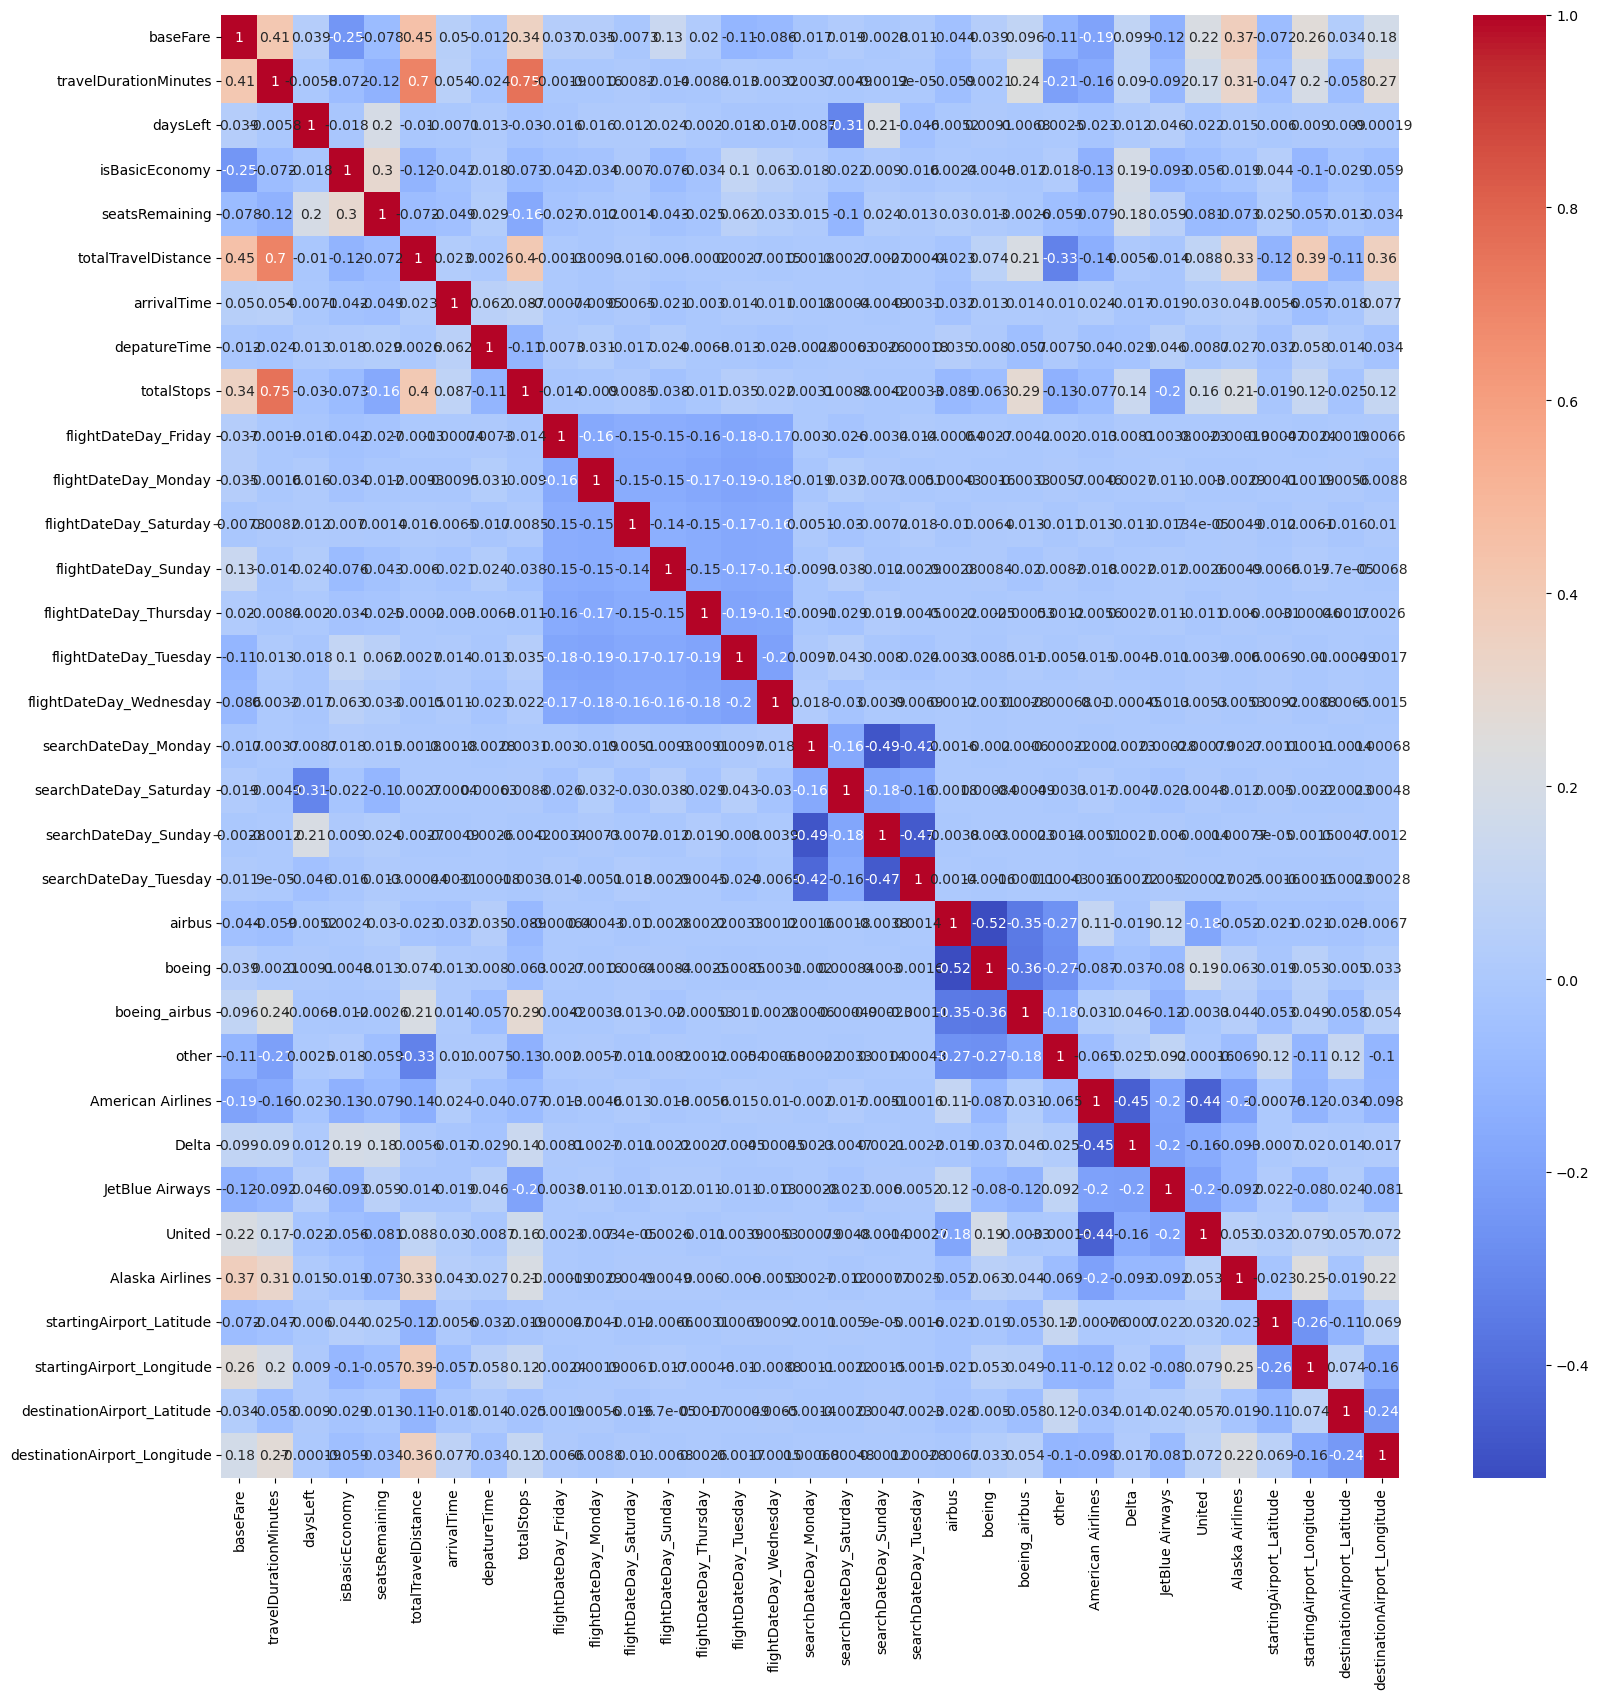

In [53]:
# Korrelationsmatrix erstellen
#corr_matrix = df.corr()

# Korrelationsmatrix anzeigen
#print(corr_matrix)

# Heatmap der Korrelationsmatrix erstellen
#plt.figure(figsize=(10, 8))
plt.figure(figsize=(19, 19))
#plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Plot anzeigen
plt.show()

In [ ]:
##  TODO

Aussortieren von Feature, da die correlation kleiner als 0,001 ist.

Zwischen 'baseFare' und 'flightMonth' ist eine Korrelation von 0,00027.

Zwischen 'baseFare' und 'searchDay' ist eine Korrelation von 0,0014.

Beide Werte werden folgend nicht mehr betrachtet.

In [42]:
random_sample= random_sample.drop('flightMonth', axis=1)
random_sample= random_sample.drop('searchDay', axis=1)
print(random_sample.head(10))

NameError: name 'random_sample' is not defined

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame called 'random_samples'

# Create a DataFrame to store the VIF values
vif = pd.DataFrame()
vif["Feature"] = random_sample.columns
vif["VIF"] = [variance_inflation_factor(random_sample.values, i) for i in range(random_sample.shape[1])]

# Display the VIF values
print(vif)

In [ ]:
desired_and_encoded_columns = ['startingAirport', 'destinationAirport', 'fareBasisCode', 'travelDurationMinutes',  'isBasicEconomy', 'isRefundable', 
                   'isNonStop', 'baseFare', 'seatsRemaining', 'totalTravelDistance', 'segmentsAirlineName', 'segmentsEquipmentDescription','flightDate', 
                   'arrivalTime', 'depatureTime' ]

# creat new dataframe with selected columns
df_new = df[desired_columns].copy()
df=df_new

In [ ]:
df_new.info()
df_new.head(5)
df_new.isnull().sum()
df_new.shape

## 5. Exploratory Data Analysis 

In [ ]:
sns.boxplot(data=df, y = 'baseFare')
plt.title("Price distribution");

In [ ]:
# check correlation beetween 
# Select the desired rows
selected_rows = df[['baseFare', 'flightDate', 'searchDate', 'totalTravelDistance', 'travelDurationMinutes', 'daysLeft']]

# Calculate the correlation between the selected rows
correlation = selected_rows.corr()

# Print the correlation matrix
print(correlation)

In [ ]:
plt.style.use('dark_background')
sns.displot(x= 'baseFare', data=df);

In [ ]:
#df['arrivalTime'].astype(str).str[:2].value_counts().sort_values()
df['arrivalTime'].astype(int).value_counts().sort_index()


In [ ]:
df['arrivalTime'].astype(int).value_counts().sort_index().plot(kind='line')
plt.xlabel('hours')
plt.ylabel('frequency')
plt.title("most hours of arrival time",
          fontsize='20');

In [ ]:
df['arrivalTime'].astype(int).value_counts().sort_index().plot(kind='line')
plt.xlabel('hours')
plt.ylabel('frequency')
plt.title("most hours of depurture time",
          fontsize='20');

In [ ]:
nonStop.head(5)

In [ ]:
nonStop = df.loc[df['isNonStop'] == True, ['segmentsAirlineName','baseFare']]
plt.figure(figsize=(10,10))
plt.xlabel("Airline", fontsize=15)
plt.ylabel("Price", fontsize=15)
#sns.lineplot(data=nonStop, x='segmentsAirlineName', y='baseFare', hue='segmentsAirlineName', color='blue')

plt.title("Airline Vs Price", fontsize=20)
# Create a legend
plt.legend(loc='right')
plt.show()

In [ ]:
# Wie viele verschiedene Arline typen gibt es?
df['segmentsAirlineName'].nunique()

df['isNonStop'].sum()

In [ ]:
nonStop['baseFare'].max()

In [ ]:
nonStop['baseFare'].min()

In [ ]:
# wie viele NonStop Flüge gibt es?
df['isNonStop'].sum()

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

sns.countplot(x='destinationAirport', data=df, palette='Blues_r', order=df['destinationAirport'].value_counts().index, ax=ax[0]).set(title='Frequency of Destination Airport')
sns.countplot(x='startingAirport', data=df, palette='Blues_r', order=df['startingAirport'].value_counts().index, ax=ax[1]).set(title='Frequency Starting Airport')

plt.tight_layout()
plt.show()

In [ ]:
top20Routes = df['totalRoute'].value_counts()[:20]

plt.figure(figsize=(15,7))
chart=sns.countplot(y='totalRoute',data=df,palette='Blues', order = top20Routes.index)
plt.title("most 20 routes",
          fontsize='20')



In [ ]:
#plt.style.use('dark_background')
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='totalTravelDistance', y='baseFare', hue='isBasicEconomy', palette='hls')
plt.xlabel("Distance", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

In [ ]:
# Ermitteln Sie das Maximum aus Spalte A, wenn Spalte B True ist
max_value = df.loc[df['isBasicEconomy'] == True, 'baseFare'].max()

# Zeigen Sie das Ergebnis an
print('Der teuerste Economy FLug beträgt:' , max_value, 'USD.')

In [ ]:
from matplotlib.lines import Line2D
#plt.figure(figsize=(10,10))
plt.xlabel("Day of the week", fontsize=15)
plt.ylabel("Price", fontsize=15)
sns.lineplot(data=df, x='flightDateDay', y='baseFare', color='blue')
sns.lineplot(data=df, x='searchDateDay', y='baseFare', color='pink')
plt.title("Effekt of the Days", fontsize=20)
# Create custom legend labels with name and color
custom_legend = [
    Line2D([0], [0], color='blue', lw=2, label='Flight Date'),
    Line2D([0], [0], color='pink', lw=2, label='Search Date')
]

plt.legend(handles=custom_legend, fontsize=12)

plt.show()

In [ ]:
plt.scatter(df["daysLeft"],
            df["baseFare"],s=30, color='blue')

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("No of days left", fontsize=15)
plt.ylabel("Price", fontsize=15)
sns.lineplot(data=df, x='daysLeft', y='baseFare', color='blue')
plt.title("Days left with Departure Vs Price", fontsize=20)
plt.show()

## Notizen
Interessante überlegungen zum Datensatz:
a) Ist der Preis je nach Fluggesellschaft unterschiedlich?
b) Wie wirkt sich der Preis aus, wenn die Tickets nur 1 oder 2 Tage vor dem Abflug gekauft werden?
c) Ändert sich der Ticketpreis je nach Abflugzeit und Ankunftszeit?
d) Wie unterscheidet sich der Ticketpreis zwischen Economy und Business Class?

# 6. Model Entwicklung

## Erstellung Datensets

In [ ]:
desired_columns = ['startingAirport', 'destinationAirport', 'travelDurationMinutes',  'isBasicEconomy', 'isRefundable', 
                   'isNonStop', 'baseFare']

# creat new dataframe with selected columns
df_new = df[desired_columns].copy()
df=df_new

## Spliting the Data

In [54]:
df = df_desired_columns

In [55]:
X = df.drop(columns= "baseFare")
y = df["baseFare"]


In [56]:
from sklearn.model_selection import train_test_split
# Daten in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Berechnung des Baseline Mean Absolute Error (MAE) für die Spalte 'baseFare' im DataFrame 'df

Die Baseline-Methode wird verwendet, um eine Referenzleistung zu erhalten, mit der die Leistung unseres eigentlichen Modells vergliechen werden kann. 
In diesem Fall wird der Baseline-MAE berechnet, indem wir den Durchschnittswert ('y_mean') der 'baseFare'-Spalte nehmen und eine Vorhersage ('y_pred_mae') für alle Datenpunkte im DataFrame erstellen, die diesem Durchschnittswert entsprechen.

Der MAE gibt uns den durchschnittlichen absoluten Unterschied zwischen den tatsächlichen 'baseFare'-Werten und den Baseline-Vorhersagewerten an. 
Wenn unser Modell eine bessere Leistung erzielt, sollte der MAE niedriger sein als der Baseline-MAE.

Der Baseline-MAE ist nützlich, um eine erste Einschätzung der Vorhersageleistung eines Modells zu erhalten. 

Ein niedriger Baseline-MAE, könnte darauf hinweisen, dass die Daten nicht viele variierende Muster enthalten und ein einfacher Durchschnitt als Vorhersage ausreicht. 
In diesem Fall müsste möglicherweise ein komplexeres Modell entwickelt werden, um bessere Vorhersagen zu erzielen.

Ein hoher Baseline-MAE, deutet darauf hin, dass es Muster und Zusammenhänge in den Daten gibt, die von einem Modell erfasst werden könnten. .

Insgesamt dient der Baseline-MAE als Ausgangspunkt für unsere Modellbewertung und hilft uns dabei, unseren Fortschritt und den Mehrwert unseres Modells zu beurteilen.

In [46]:
df['baseFare'].min()

8.72

In [59]:
from sklearn.metrics import mean_absolute_error

y_mean = df['baseFare'].mean()
y_pred_mae = [y_mean] * len(df)
y_baseline = mean_absolute_error(df['baseFare'], y_pred_mae)
print("Baseline MAE:", round(y_baseline))


Baseline MAE: 146


# TODO bitte nochmal im internet recherchieren ob das richtig ist

Der MAE beträgt 146.
Das bedeutet, dass unsere Baseline-Vorhersagen im Durchschnitt um 146 Einheiten von den tatsächlichen Flugpreisen abweichen.

Um die Leistung unseres Modells zu bewerten, sollten wir sicherstellen, dass der MAE unseres Modells niedriger ist als dieser Baseline-MAE. Ein niedrigerer MAE zeigt an, dass unser Modell genauer ist und eine bessere Vorhersage der Flugpreise liefert.

Es ist wichtig anzumerken, dass die Flugpreise in den Trainingsdaten einen breiten Bereich von 8.72 USD bis 4407.44 USD abdecken. Dieser Bereich spiegelt die Varianz und die unterschiedlichen Preise wider, die in den Flugdaten vorkommen. Indem wir unseren MAE mit dieser Spannweite vergleichen, können wir die Leistung unseres Modells besser einschätzen und bewerten, wie gut es in der Lage ist, die Flugpreise vorherzusagen.

## Random Forrest

Der Random Forest Regressor komibiert mehrerer Decision Trees, um eine Vorhersage zu treffen. 
Im Training werden die  interen Parameter so optimiert, dass eine möglichst zutreffende Vorhersage erzielt werden kann.

Nachdem das Modell trainiert wurde, haben wir Vorhersagen auf dem Testdatensatz (X_test) gemacht. Hierbei haben wir die Methode "predict()" auf dem rf_model-Objekt aufgerufen und als Ergebnis die Vorhersagewerte "y_pred" erhalten. 

Zur Evaluierung des Modelles wird der Mean Squared Error (MSE) herangezogen. Diese misst die durchschnittliche quadratische Abweichung zwischen den tatsächlichen Testwerten (y_test) und den vorhergesagten Werten (y_pred). Ein niedrigerer MSE deutet auf eine bessere Vorhersageleistung hin.

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a random forest regressor object
rf_model = RandomForestRegressor()

# Train the random forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluation des Modells
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 4192.026262180848
Mean Absolute Error: 31.65122046037358


In unserem Fall beträgt der MSE 4471.650895294656. Dies bedeutet, dass die durchschnittliche quadratische Abweichung zwischen den tatsächlichen Flugpreisen und den Vorhersagen unseres Modells 4471.650895294656 beträgt.

## Feature Importance

In [64]:
#from sklearn.ensemble import RandomForestRegressor

# Create an instance of the Random Forest regressor
#model = RandomForestRegressor()

# Fit the model to your data
#model.fit(X_train, y_train)

# Get the feature importances
feature_importances = rf_model.feature_importances_

# Create a dataframe to display the feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(importance_df)

                         Feature  Importance
4            totalTravelDistance    0.305417
0          travelDurationMinutes    0.066582
30               Alaska Airlines    0.064493
5                    arrivalTime    0.058612
32     startingAirport_Longitude    0.045543
27                         Delta    0.042309
2                 isBasicEconomy    0.042274
34  destinationAirport_Longitude    0.041305
29                        United    0.040216
10                    totalStops    0.039362
1                       daysLeft    0.035771
6                   depatureTime    0.033388
33   destinationAirport_Latitude    0.030933
31      startingAirport_Latitude    0.027259
7                      flightDay    0.024060
26             American Airlines    0.022038
14          flightDateDay_Sunday    0.015581
3                 seatsRemaining    0.013605
23                        boeing    0.006411
12          flightDateDay_Monday    0.004965
13        flightDateDay_Saturday    0.004667
16        

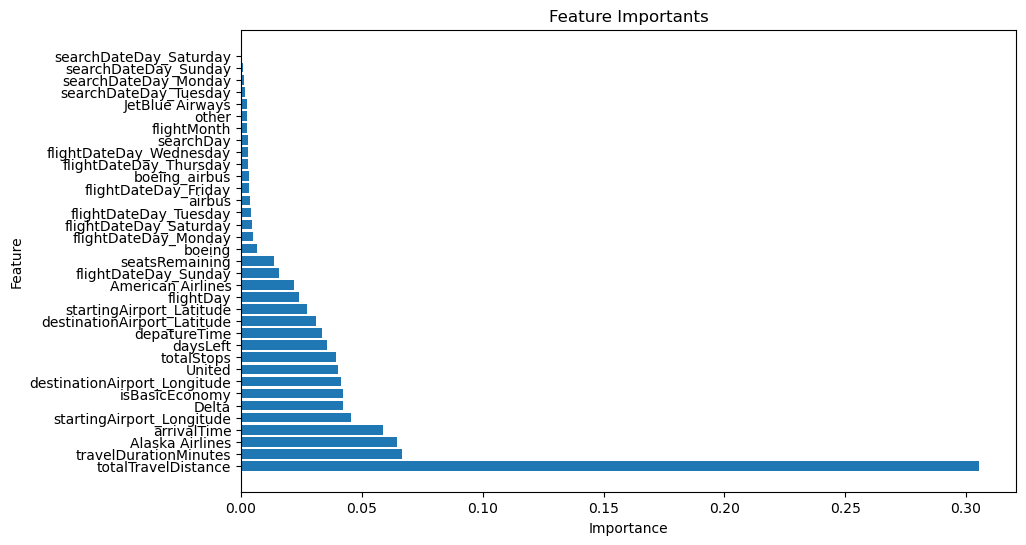

In [65]:

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importants')
plt.show()

## Lineare Regression

In [60]:
from sklearn.linear_model import LinearRegression

# Instanz eines linearen Regressionsmodells
model = LinearRegression()

# Training
model.fit(X_train, y_train)

# Vorhersagen für die Testdaten
y_pred = model.predict(X_test)

# Bewertung der Vorhersageleistung
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 29846.53999798729
Mean Absolute Error: 97.72757161161941


In [61]:
y_pred

array([308.57800465, 388.26183186, 330.50573051, ..., 306.46360167,
       480.47825051, 192.5560313 ])